# Looking into factors that made it more likely that a passenger on the titanic survived the trip.

*************

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

Data is a subset of the Kaggle data: https://www.kaggle.com/c/titanic/data

In [3]:
df_raw = pd.read_csv('titanic_data.csv')

## Get familiar with the data


From the Kaggle site: https://www.kaggle.com/c/titanic/data

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

In [291]:
df = df_raw
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


In [5]:
df.describe()

/Users/edude/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Questions to answer about the data

Which sub-group of passengers, based on their passenger class, sex, age, or family ties, had higher rates of surviving the shipwreck?  Which of the given traits can be transformed to make the analysis easier to interpret?

## As a first pass, check if data needs to be cleaned or transformed.

Counting all non-empty values for each column; out of 891 rows possible:
Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Fare have 891 rows of data.
Age, Cabin, and Embarked have some rows without data.  In particular, Age has 714 rows of data out of 891 possible.

In [31]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

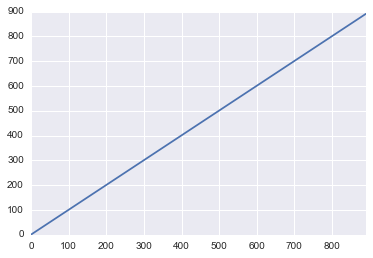

In [292]:
#plot passengerId: passengerId increments by 1 from 1 to the total number of passengers
df['PassengerId'].plot();

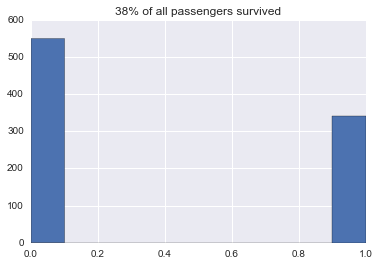

In [299]:
#Survived: plot: more died than survived
survival_rate = 100*sum(df['Survived']==1) / float(len(df))
plt.title('{:.0f}% of all passengers survived'.format(survival_rate))
df['Survived'].hist();

About half of passengers were 3rd class, and half were either 1st or 2nd class

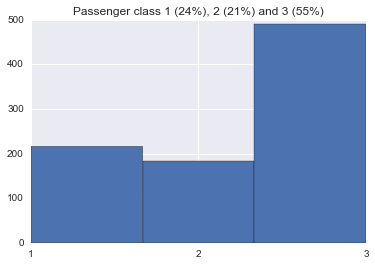

In [310]:
#Pclass: plot: 
rate1 = 100*sum(df['Pclass']==1) / float(len(df))
rate2 = 100*sum(df['Pclass']==2) / float(len(df))
rate3 = 100*sum(df['Pclass']==3) / float(len(df))
plt.title('Passenger class 1 ({:.0f}%), 2 ({:.0f}%) and 3 ({:.0f}%)'.format(rate1,rate2,rate3))
df['Pclass'].hist(bins=3);
plt.xticks([1,2,3]);

714 of 891 passengers have an Age data value; these were removed in this plot only

In [334]:
age_series = df[df['Age'].apply(lambda x: not math.isnan(x))]['Age']
bin_range = range(0,int(math.ceil(max(df['Age']))),5)

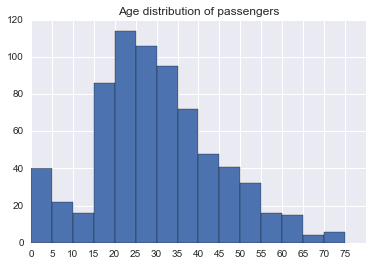

In [337]:
plt.title('Age distribution of passengers')
plt.hist(x=age_series,bins=bin_range);
plt.xticks(bin_range);

In [143]:
df['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [144]:
df['Sex'].unique() #all 'Sex' column values are either 'male' or 'female'.

array(['male', 'female'], dtype=object)

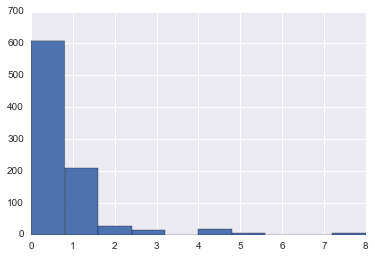

In [338]:
df['SibSp'].hist(); #number of siblings traveling with passengerdf

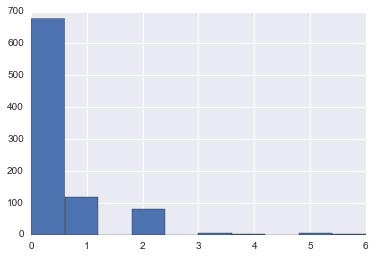

In [339]:
df['Parch'].hist();

Someone paid 500 for a ticket?

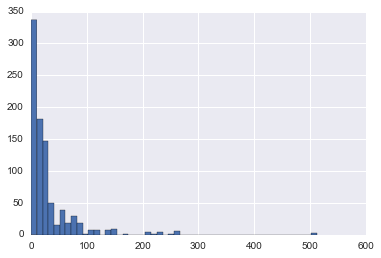

In [111]:
df['Fare'].hist(bins=50);

Looks like some fares were pretty expensive.  
Many of these high-fare passengers survived; the ones that did not were all male

In [52]:
df[df['Fare']>200][['Fare','Survived','Pclass','Sex']].sort_values(by=['Survived','Sex'])

,Fare,Survived,Pclass,Sex
27,263.0000,0,1,male
118,247.5208,0,1,male
377,211.5000,0,1,male
438,263.0000,0,1,male
527,221.7792,0,1,male
557,227.5250,0,1,male
88,263.0000,1,1,female
258,512.3292,1,1,female
299,247.5208,1,1,female
311,262.3750,1,1,female


I don't see any data that looks like an error, so I'll work with the non-NaN data and create some categories to simplify the data into smaller groups.

## Plot attributes survival rates

Fare price and passenger class may be related.  Since there are 3 passenger classes, I want to see if the fares each class paid are distinct from each other, or can be grouped together to form smaller groups for comparison.

### Examine Passenger class as it relates to fare price

Plot a histogram of fare prices, grouped by Pclass

In [60]:
fare_Pclass1 = df[df['Pclass']==1]['Fare']
fare_Pclass2 = df[df['Pclass']==2]['Fare']
fare_Pclass3 = df[df['Pclass']==3]['Fare']

Fares paid by Pclass 2 and Pclass 3 were more similar to each other than to Pclass 1 fares.
I will combine class 2 and 3 together to compare them with class 1

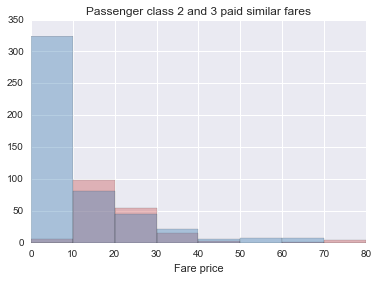

In [179]:
plt.title('Passenger class 2 and 3 paid similar fares') 
plt.xlabel('Fare price')
binwidth=10
max_fare=max(max(fare_Pclass2),max(fare_Pclass3))
bin_range=range(0,int(math.ceil(max_fare))+binwidth,binwidth)
plt.hist(x=fare_Pclass2,color='indianred',alpha=0.4,bins=bin_range);#use semi-colon to suppress array output when plotting
plt.hist(x=fare_Pclass3,color='steelblue',alpha=0.4,bins=bin_range);

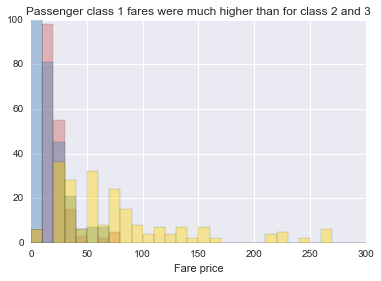

In [185]:
plt.title('Passenger class 1 fares were much higher than for class 2 and 3') 
plt.xlabel('Fare price')
binwidth=10
max_fare = max(df['Fare'])
bin_range = range(0,int(math.ceil(max_fare))+binwidth,binwidth)
plt.hist(x=fare_Pclass2,color='indianred',alpha=0.4,bins=bin_range);#use semi-colon to suppress array output when plotting
plt.hist(x=fare_Pclass3,color='steelblue',alpha=0.4,bins=bin_range);
plt.hist(x=fare_Pclass1,color='gold',alpha=0.4,bins=bin_range);
#note that the largest count is over 300, but I reduced the y-axis range to see the rest of the data more easily
plt.ylim([0,100]);
#the largest fare was over 500, but I reduced the x-axis range to see the data more easily
plt.xlim([0,300]);

### Upper class passengers were twice as likely to survive as non-Upper class passengers

Create a column 'Upperclass', with 1 if Pclass is 1, and 0 otherwise

In [76]:
df['Upperclass'] = df['Pclass'].apply(lambda x: 1 if x==1 else 0)

There were more than 3x as many non-upperclass passengers as upper-class passengers

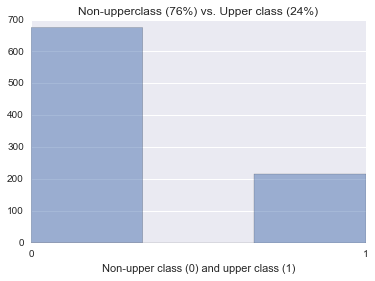

In [345]:
pc_upper = 100*sum(df['Upperclass']==1) / float(len(df))
plt.title('Non-upperclass ({:.0f}%) vs. Upper class ({:.0f}%)'.format(100-pc_upper, pc_upper))
df['Upperclass'].hist(bins=3,alpha=0.5);
plt.xticks([0,1]);
plt.xlabel('Non-upper class (0) and upper class (1)');

Plot survival rates for upperclass versus non upper class passengers
Upperclass passengers were more likely to survive than to die.
Non-upperclass passengers were more likely to die than survive.  The survival rate of upperclass passengers was twice that of non-upperclass passengers.

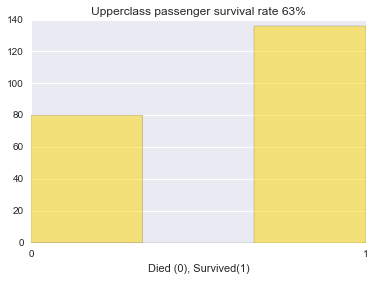

In [352]:
pc_survived = 100* sum( (df['Upperclass']==1) & df['Survived']==1)  / float(sum(df['Upperclass']==1))
plt.title('Upperclass passenger survival rate {:.0f}%'.format(pc_survived))
plt.hist(x=df[df['Upperclass']==1]['Survived'],color='gold',alpha=0.5,bins=3);
plt.xticks([0,1]);
plt.xlabel('Died (0), Survived(1)');

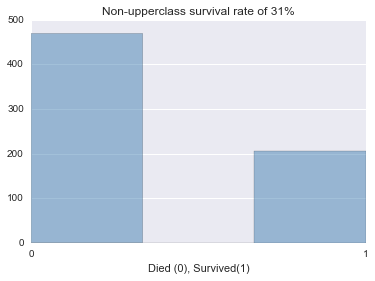

In [350]:
pc_survived = 100* sum( (df['Upperclass']==0) & df['Survived']==1)  / float(sum(df['Upperclass']==0))
plt.title('Non-upperclass survival rate of {:.0f}%'.format(pc_survived))
plt.hist(x=df[df['Upperclass']==0]['Survived'],color='steelblue',alpha=0.5,bins=3);
plt.xticks([0,1]);
plt.xlabel('Died (0), Survived(1)');

### Among non-upperclass passengers, females were more likely to survive

Were male or female passengers more likely to survive?  I'll look at just non-upperclass passengers in order to control for the 'Passenger class' variable.  It looks like, among non-upperclass passengers, males were more likely to die than to survive, and females were more likely to survive than to die. Females in non-upperclass class were more than four times as likely to survive compared to non-upperclass males.

In [112]:
#df_lc : lower-class data frame
df_lc = df[df['Upperclass'] == 0]
df_lc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0


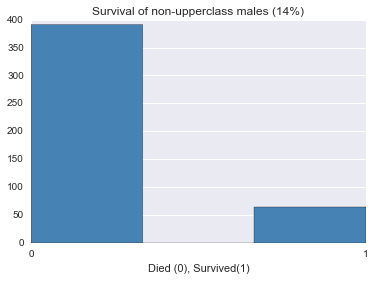

In [357]:
pc_survived = 100* sum( (df_lc['Sex']=='male') & (df_lc['Survived']==1) ) / float(sum(df_lc['Sex']=='male'))
plt.title('Survival of non-upperclass males ({:.0f}%)'.format(pc_survived))
plt.hist(x=df_lc[df_lc['Sex']=='male']['Survived'],color='steelblue',bins=3);
plt.xticks([0,1]);
plt.xlabel('Died (0), Survived(1)');

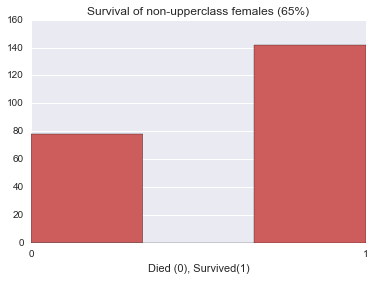

In [358]:
pc_survived = 100* sum( (df_lc['Sex']=='female') & (df_lc['Survived']==1) ) / float(sum(df_lc['Sex']=='female'))
plt.title('Survival of non-upperclass females ({:.0f}%)'.format(pc_survived))
plt.hist(x=df_lc[df_lc['Sex']=='female']['Survived'],color='indianred',bins=3);
plt.xticks([0,1]);
plt.xlabel('Died (0), Survived(1)');

### Among non-upperclass males, most age levels were more likely to die, with a minor exeption of boys 10 and under

Among non-upperclass males, did age affect survival?  I'm looking at just the subset of non-upperclass males in order to remove the effects of other variables (class and sex).

In [132]:
df_lcm = df_lc[df_lc['Sex']=='male']
df_lcm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0


Since many of the ages are missing, remove those rows first.

In [150]:
len(df_lcm) #455 rows ()

455

In [146]:
sum(df_lcm['Age'].apply(math.isnan)) #103 rows have Age as NaN

103

In [136]:
df_lcm_age = df_lcm[df_lcm['Age'].apply(lambda x: False if math.isnan(x) else True)]
df_lcm_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S,0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,0


In [151]:
len(df_lcm_age['Age']) #352 passengers are non-upperclass males with Age data

352

Plot Age for surviving and non-surviving non-upperclass male passengers
Non-upperclass males were generally more likely to die for any age level, with a slightly higher survival for Ages 5 and under.

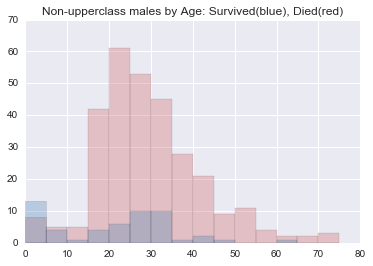

In [195]:
plt.title('Non-upperclass males by Age: Survived(blue), Died(red)')
binwidth=5
max_age = max(df_lcm_age['Age'])
bin_range = range(0,int(math.ceil(max_age))+binwidth,binwidth)
#plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
plt.hist(df_lcm_age[df_lcm_age['Survived']==0]['Age'],color='indianred',alpha=0.3,bins=bin_range);
plt.hist(df_lcm_age[df_lcm_age['Survived']==1]['Age'],color='steelblue',alpha=0.3,bins=bin_range);

Zoom in to look at younger ages in more detail.  The sample of males 10 and under is rather small, but within the zero to 5 range, more survived, and within the 5 to 10 range, the survival/death count was about the same.

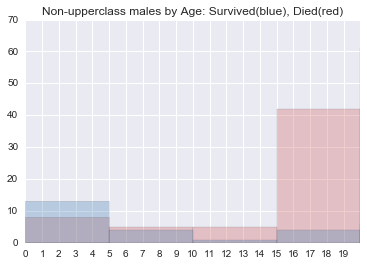

In [363]:
plt.title('Non-upperclass males by Age: Survived(blue), Died(red)')
binwidth=5
max_age = max(df_lcm_age['Age'])
bin_range = range(0,int(math.ceil(max_age))+binwidth,binwidth)
#plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
plt.hist(df_lcm_age[df_lcm_age['Survived']==0]['Age'],color='indianred',alpha=0.3,bins=bin_range);
plt.hist(df_lcm_age[df_lcm_age['Survived']==1]['Age'],color='steelblue',alpha=0.3,bins=bin_range);
#plt.ylim([0,10]);
plt.xlim([0,20]);
plt.xticks(range(0,20,1));

### Those non-upperclass males with family on board were more likely to survive compared to those who travelled alone, but overall survival rates were still low

Check if having at least one sibling, spouse, parent or child had any relationship with survival. Create a column for 'Family', with 1 if SibSp is >0 or if Parch >0.  Look at just the subset of non-upperclass males to control for class and sex.

Whether non-upper class males had other family on board or not, most died, but those that had family members had a 21% survival rate compared to 12% for those that were alone.

In [199]:
df_lcm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0


All rows in SibSp and Parch are not NaN

In [213]:
sum([math.isnan(x) for x in df_lcm['SibSp']])

0

In [212]:
sum([math.isnan(x) for x in df_lcm['Parch']])

0

In [388]:
lcm_family_truefalse = [s>0 or p>0 for s,p in zip(df_lcm['SibSp'],df_lcm['Parch'] >0)]

In [391]:
lcm_family = [1 if x else 0 for x in lcm_family_truefalse ]

In [413]:
ser_lcm_family =pd.Series(lcm_family, index=df_lcm.index)

In [414]:
df_lcm['Family'] = ser_lcm_family

/Users/edude/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [415]:
df_lcm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,0


In [401]:
del df_lcm['Family']

In [404]:
df_lcm['Family2'] = ser_lcm_family

/Users/edude/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [240]:
df_lcm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,1
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,0,0


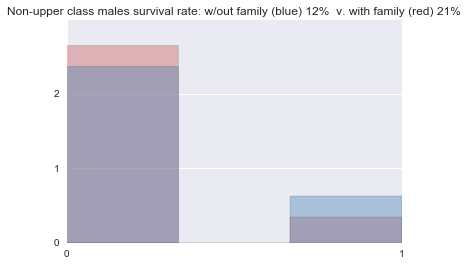

In [290]:
survival_rate_alone = 100* sum( (df_lcm['Family']==0) & (df_lcm['Survived'] == 1)) / float(sum(df_lcm['Family']==0))
survival_rate_family = 100* sum( (df_lcm['Family']==1) & (df_lcm['Survived'] == 1)) / float(sum(df_lcm['Family']==1))
plt.title('Non-upper class males survival rate: w/out family (blue) {:.0f}%  v. with family (red) {:.0f}%'.format(survival_rate_alone,survival_rate_family))
plt.hist(df_lcm[df_lcm['Family']==0]['Survived'],color='indianred',bins=3,normed=True,alpha=0.4);
plt.hist(df_lcm[df_lcm['Family']==1]['Survived'],color='steelblue',bins=3,normed=True,alpha=0.4);
plt.xticks([0,1]);
plt.yticks(range(0,3,1));

## Summarize survival rates by passenger characteristics

In [424]:
df_by_sex = df[['Survived','Sex']].groupby('Sex').mean()
df_by_sex

,Survived
Sex,
female,0.742038
male,0.188908


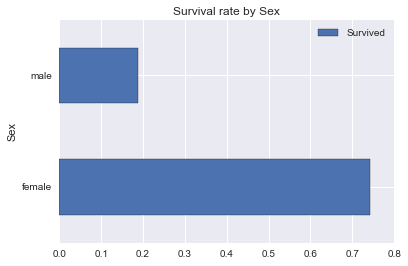

In [658]:
df_by_sex.plot(kind='barh');
plt.title('Survival rate by Sex');

In [428]:
df_by_pclass = df[['Survived','Pclass']].groupby('Pclass').mean()
df_by_pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


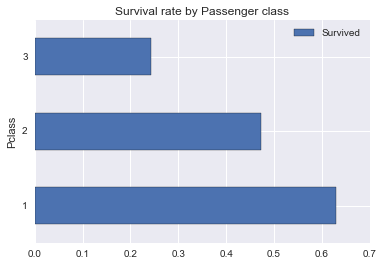

In [657]:
df_by_pclass.plot(kind='barh');
plt.title('Survival rate by Passenger class');

In [461]:
df_by_sex_pclass = df[['Survived','Sex','Pclass']].groupby(by=['Sex','Pclass']).mean()
df_by_sex_pclass

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

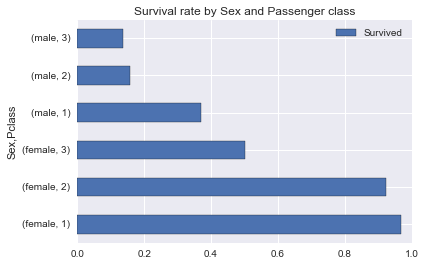

In [656]:
df_by_sex_pclass.plot(kind='barh');
plt.title('Survival rate by Sex and Passenger class');

Histogram the age, but first remove rows where Age is missing

In [466]:
df_rmna = df[df['Age'].apply(lambda x: not math.isnan(x))]

Bin by year, for surived and died, and for all; get the survival rate for each age range

In [571]:
max_age = df['Age'].max()
age_bins = np.arange(0,max_age+1,1)
age_labels = np.arange(0,max_age,1)
passenger_by_age_category = pd.cut(df_rmna['Age'],age_bins,right=False)
survived_by_age_category = pd.cut(df_rmna[df_rmna['Survived']==1]['Age'],age_bins,right=False)
passenger_by_age_counts = passenger_by_age_category.value_counts().astype(float)
passenger_by_age_counts.sort_index(inplace=True)
survived_by_age_counts = survived_by_age_category.value_counts().astype(float)
survived_by_age_counts.sort_index(inplace=True)
df_passenger_by_age_counts = pd.DataFrame(passenger_by_age_counts)
survival_rate_by_age = survived_by_age_counts / passenger_by_age_counts
df_survival_rate_by_age = pd.DataFrame(survival_rate_by_age)

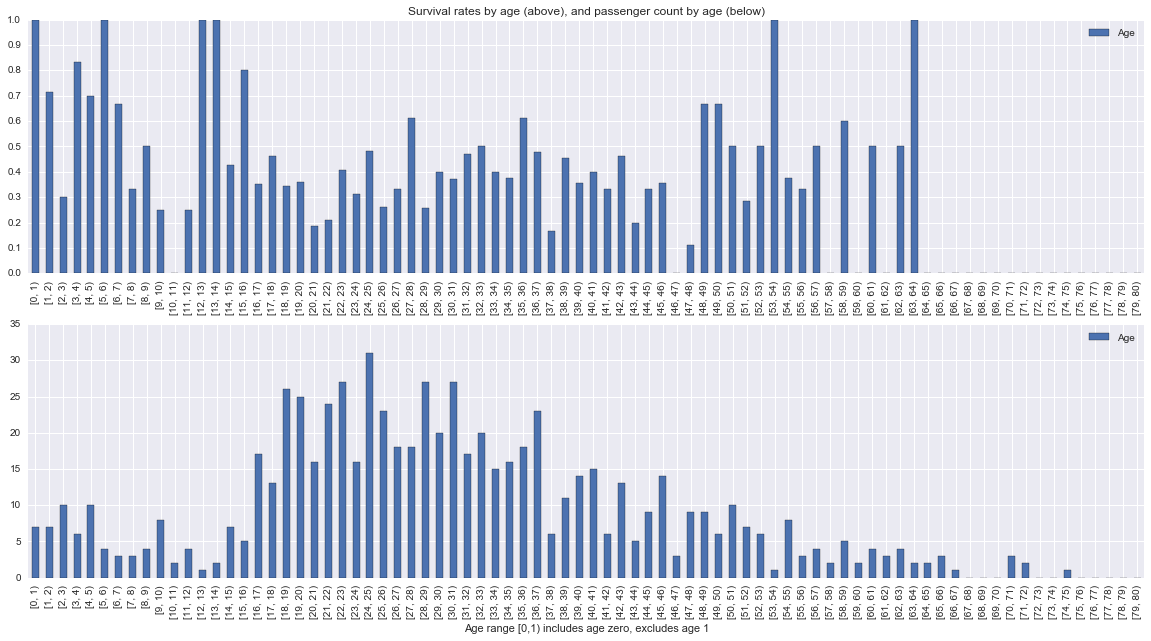

In [632]:
f, (axis1,axis2) = plt.subplots(2,1,figsize=(20,10))
axis1.set_title('Survival rates by age (above), and passenger count by age (below)');
df_survival_rate_by_age.plot(kind='bar',yticks=np.arange(0,1.1,0.1),ax=axis1);
df_passenger_by_age_counts.plot(kind='bar',ax=axis2);
axis2.set_xlabel('Age range [0,1) includes age zero, excludes age 1');

Notice that the survival rate appears somewhat bi-modal, with higher rates at age less than 18 and and age greater than 48.  However, the number of passengers in these age groups is also smaller, so the smaller sample size may mean that these numbers are less generalize-able.

### Family ties

See how having a sibling or spouse, or parent or child, was related to survival rates.  Perhaps having another family member made it more likely for someone to survive.  For instance, if women and children were given priority on the life boats, then anyone related to a woman or child (even men) may have been given priority to board the life boats.

Most passengers traveled alone, and some traveled with one other family member, while very few traveled with more than one family member.  I'll add a column 'Family', with 1 for those that had at least 1 family member, zero otherwise.

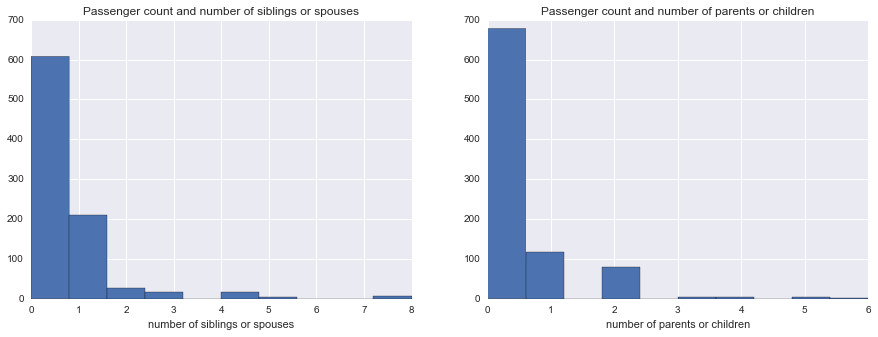

In [635]:
fig, (axes1, axes2) = plt.subplots(1,2,figsize=(15,5))
axes1.hist(df['SibSp']);
axes1.set_title('Passenger count and number of siblings or spouses');
axes1.set_xlabel('number of siblings or spouses');
axes2.hist(df['Parch']);
axes2.set_title('Passenger count and number of parents or children');
axes2.set_xlabel('number of parents or children');

Create column 'Family', which has 1 if passenger had at least 1 sibling, spouse, parent or child

In [646]:
has_sibsp = df['SibSp'] >=1
has_parch = df['Parch'] >=1
has_sibsp_parch = has_sibsp | has_parch
ser_family = pd.Series([1 if x else 0 for x in has_sibsp_parch])
df['Family'] = ser_family

In [647]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Upperclass,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [650]:
df_by_family = df[['Survived','Family']].groupby('Family').mean()
df_by_family

,Survived
Family,
0,0.303538
1,0.505650


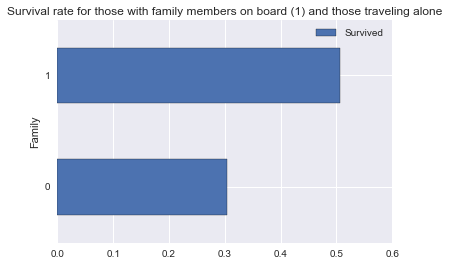

In [655]:
df_by_family.plot.barh();
plt.title('Survival rate for those with family members on board (1) and those traveling alone');

In [662]:
df_sex_family = df[['Survived','Sex','Family']].groupby(['Sex','Family']).mean()
df_sex_family

Survived
Sex    Family          
female 0       0.785714
       1       0.712766
male   0       0.155718
       1       0.271084

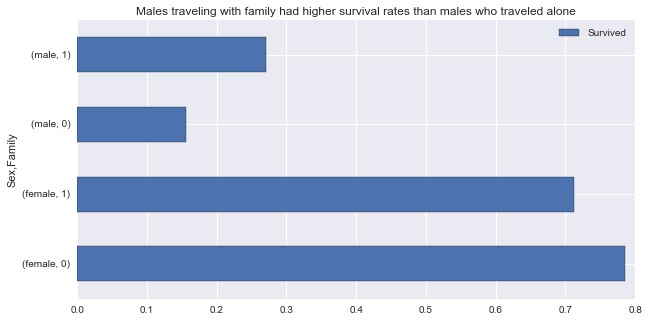

In [667]:
df_sex_family.plot.barh(figsize=(10,5));
plt.title('Males traveling with family had higher survival rates than males who traveled alone');